# DFAnalyzer Simple Example

This notebook will guide you to load a trace file generated by DFTracer and analyze the trace events using Dask.

In [1]:
%load_ext autoreload
%autoreload 2

## System imports for the notebook

In [2]:

import os
from pathlib import Path
import sys

## We add the analysis code to path so that we can run this in dev mode.

In [3]:
app_root = str(Path(os.getcwd()).parent.parent)
sys.path.insert(0, app_root)

## Imports for the notebook

This may take some time as it initializes Dask.

In [4]:
# Importing DFAnalyzer
import dfanalyzer
print(dfanalyzer.__file__)
from dfanalyzer.main import DFAnalyzer, update_dft_configuration, setup_logging, setup_dask_cluster, reset_dask_cluster

/usr/WS2/haridev/dftracer/dfanalyzer/__init__.py


## Initialize DFAnalyzer Configuration

In this function, we can tune DFAnalyzer for the analysis. For example, we can tune number of workers, connect to existing dask cluster, etc.

In [5]:
conf = update_dft_configuration(verbose=True, workers=4, log_file=f"./df_{os.getenv('USER')}.log")

## This methods sets up logging for DFAnalyzer.

This is needed for debugging and progress tracking. All prints seen in the following cells are configured in this method.

In [6]:
setup_logging()

## Setup dask cluster.

In this example, we use Dask Local cluster which will use multiprocessing on the same node where the notebook is running to run its workers.

**NOTE:** If your running on Remote VSCode on a cluster, you can tunnel the port and open it locally.

In [7]:
setup_dask_cluster()

[INFO] [14:58:55] Initialized Client with 4 workers and link http://127.0.0.1:8787/status [/usr/WS2/haridev/dftracer/dfanalyzer/main.py:770]


On clicking the link, you will see a daskboard like this. [Dask Daskboard Image](images/dask-dashboard-load.png)

## Reset Dask Cluster

In case you have an error and want to clean the cluster for fresh analysis. You can run this.

In [15]:
reset_dask_cluster()

[INFO] [15:01:44] Restarting all workers [/usr/WS2/haridev/dftracer/dfanalyzer/main.py:760]


## Load the DFAnalyzer Trace

The DFAnalyzer class take a regex string as input. For example, "{app_root}/examples/dfanalyzer/*.pfw.gz"

In [16]:
analyzer = DFAnalyzer(f"/usr/workspace/haridev/dftracer/build/test/*.gz")

[INFO] [15:01:46] Created index for 1 files [/usr/WS2/haridev/dftracer/dfanalyzer/main.py:428]
[INFO] [15:01:46] Total size of all files are <dask.bag.core.Item object at 0x155540228490> bytes [/usr/WS2/haridev/dftracer/dfanalyzer/main.py:430]
[INFO] [15:01:48] Loading 1 batches out of 1 files and has 30 lines overall [/usr/WS2/haridev/dftracer/dfanalyzer/main.py:443]
[INFO] [15:01:49] Loaded events [/usr/WS2/haridev/dftracer/dfanalyzer/main.py:510]
[INFO] [15:01:49] Loaded plots with slope threshold: 45 [/usr/WS2/haridev/dftracer/dfanalyzer/main.py:516]


## Analyze the events

1. The dask dataframe is stored at `analyzer.events`. 
2. We can run dask queries on this dataframe.

In [17]:
analyzer.events.head()

,name,cat,type,pid,tid,ts,te,dur,tinterval,trange,compute_time,io_time,app_io_time,total_time,fhash,phase,size,hash,hhash,value
4,start,dftracer,0,3562915,3562915,0,0,0,<NA>,0,<NA>,<NA>,<NA>,0,<NA>,0,<NA>,<NA>,8770596893269328381,<NA>
6,CUSTOM_BLOCK,CPP_APP,0,3562915,3562915,13117,14186,1069,<NA>,0,<NA>,<NA>,<NA>,0,<NA>,0,<NA>,<NA>,8770596893269328381,<NA>
7,CUSTOM,CPP_APP,0,3562915,3562915,12035,14232,2197,<NA>,0,<NA>,<NA>,<NA>,0,<NA>,0,<NA>,<NA>,8770596893269328381,<NA>
8,foo,CPP_APP,0,3562915,3562915,10960,14251,3291,<NA>,0,<NA>,<NA>,<NA>,0,<NA>,0,<NA>,<NA>,8770596893269328381,<NA>
10,fopen,STDIO,0,3562915,3562915,17774,19748,1974,<NA>,0,<NA>,<NA>,<NA>,0,13134042296031641600,0,<NA>,<NA>,8770596893269328381,<NA>


In [18]:
analyzer.file_hash.head()

,name,pid,tid,hhash
hash,,,,
4934138233606702080,/usr/workspace/haridev/dftracer/build/test/data,3562915,3562915,8770596893269328381
11997177448727658496,/usr/workspace/haridev/dftracer/build/test/dat...,3562915,3562915,8770596893269328381
13134042296031641600,/usr/workspace/haridev/dftracer/build/test/dat...,3562915,3562915,8770596893269328381
16963829776176506880,/usr/workspace/haridev/dftracer/build/test/dat...,3562915,3562915,8770596893269328381


In [19]:
analyzer.host_hash.head()

,name,pid,tid,hhash
hash,,,,
8770596893269327872,corona82,3562915,3562915,8770596893269328381


### Summary 

DFAnalyzer supports a summary utility that gives a brief summary of the job and its I/O access behavior.

In [20]:
analyzer.metadata.head()

,name,value,pid,tid,hhash
1,3562915,thread_name,3562915,3562915,8770596893269328381
5,key,value,3562915,3562915,8770596893269328381


In [21]:
items = analyzer.summary()
items

[INFO] [15:02:00] Total number of events in the workload are 19 [/usr/WS2/haridev/dftracer/dfanalyzer/main.py:622]


╭──────────────────────────────────────────────────── Summary ────────────────────────────────────────────────────╮
│  Allocation    Scheduler Allocation Details                                                                     │
│                ├── Nodes: 1                                                                                     │
│                ├── Processes: 1                                                                                 │
│                ├── Thread allocations across nodes (includes dynamically created threads)                       │
│                │   ├── Compute: 0                                                                               │
│                │   └── I/O: 1                                                                                   │
│                └── Events Recorded: 19                                                                          │
│  Dataset       Description of Dataset Used                                                                      │
│                └── Files: 4                                                                                     │
│  I/O Behavior  Behavior of Application                                                                          │
│                ├── Split of Time in application                                                                 │
│                │   ├── Total Time: 0.129 sec                                                                    │
│                │   └── Overall I/O: 0.092 sec                                                                   │
│                └── Metrics by function                                                                          │
│                    ├── Function       |count |                  size                   |                        │
│                    ├──                |      |min   |25    |mean  |median|75    |max   |                        │
│                    ├── link           |1     |NA    |nan   |nan   |NA    |nan   |NA    |                        │
│                    ├── unlink         |1     |NA    |nan   |nan   |NA    |nan   |NA    |                        │
│                    ├── symlink        |1     |NA    |nan   |nan   |NA    |nan   |NA    |                        │
│                    ├── chmod          |1     |NA    |nan   |nan   |NA    |nan   |NA    |                        │
│                    ├── chown          |1     |NA    |nan   |nan   |NA    |nan   |NA    |                        │
│                    ├── lchown         |1     |NA    |nan   |nan   |NA    |nan   |NA    |                        │
│                    ├── utime          |1     |NA    |nan   |nan   |NA    |nan   |NA    |                        │
│                    ├── mkfifo         |1     |NA    |nan   |nan   |NA    |nan   |NA    |                        │
│                    ├── symlinkat      |1     |NA    |nan   |nan   |NA    |nan   |NA    |                        │
│                    ├── chdir          |1     |NA    |nan   |nan   |NA    |nan   |NA    |                        │
│                    ├── open           |1     |NA    |nan   |nan   |NA    |nan   |NA    |                        │
│                    └── remove         |2     |NA    |nan   |nan   |NA    |nan   |NA    |                        │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

### Timeline plots

We support two timeline plots:
1. how I/O time and I/O bandwidth changes over time.
2. how transfer size changes over time.

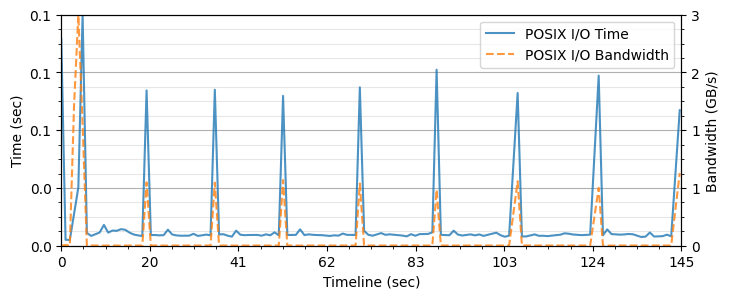

In [15]:
fig, ax1, ax2 = analyzer.plots.time_bw_timeline(
    bw_unit='gb',
    figsize=(8, 3),
    line1_label='POSIX I/O Time',
    line2_label='POSIX I/O Bandwidth',
    time_col='io_time',
    x_num_ticks=8,
    y_num_ticks=5,
)

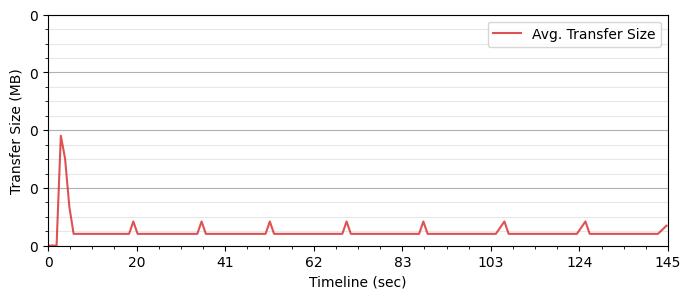

In [16]:
fig, ax = analyzer.plots.xfer_size_timeline(
    figsize=(8, 3),
    unit='mb',
    x_num_ticks=8,
)